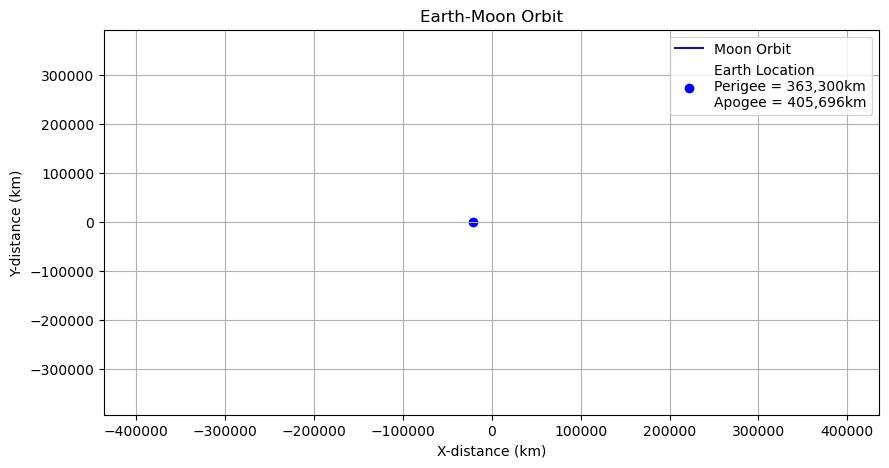

In [2]:
%matplotlib inline
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation


##Variables/functions
#Earth
big_g = 6.67428 * pow(10, -11) #Nm^2/kg^2
earth_mass = 5.972 * pow(10, 24) #kg
earth_rot_period = 23.9333 #in hours
earth_radius = 6378 #kilometers
earth_orb_period = 365.2422 #days
axial_tilt = (23.5 * np.pi) / 180
gem = 0.0098 #km/s^2

#Moon
moon_mass = 7.348 * pow(10, 22) #kg
moon_orb_period = 27.2917 #days
ecm_apogee = 405696 #km
ecm_perigee = 363300 #km
gcm = 0.001625 #km/s^2
#Sun
sun_mass = 1.989 * pow (10, 30) #kg
es_aphelion = 152097701 #km
es_perihelion = 147098074 #km

##Intermediate Vars
es_amp = (es_aphelion - es_perihelion)/2
em_amp = (ecm_apogee - ecm_perigee)/2

#Functions

def find_es_distance(time):
    return (es_amp)*np.cos((2*np.pi*time)/(earth_rot_period*earth_orb_period))+(es_aphelion-es_amp)

def find_em_majoraxes(time):
    return ecm_apogee*np.cos((2*np.pi*time)/(earth_rot_period*earth_orb_period))

def find_em_minoraxes(time):
    return ecm_perigee*np.sin((2*np.pi*time)/(earth_rot_period*earth_orb_period))

def find_tidal_force():
    return ((-2)*big_g*earth_mass*earth_radius)/(pow(ecm_distance, 3))

def find_waveheight(ecm_distance):
    return (3/2)*(big_g*earth_mass*(earth_radius**2))/(gem*(ecm_distance**2))

#Intermediates
t = np.arange(0,8750)     ##Approximate number of hours in orbit period                                                          
def ecm_disx(time):
    return find_em_majoraxes(time)

def ecm_disy(time):
    return find_em_minoraxes(time)

# ecm_dis = math.sqrt(ecm_disx**2 + ecm_disy**2)
##Earth Moon
fig, earth_moon = plt.subplots(figsize = (10,5))
x = []
y = []
line, = earth_moon.plot([], [], color = "midnightblue", label = "Moon Orbit")
earth_moon.scatter(-21198,0, label = "Earth Location\nPerigee = 363,300km\nApogee = 405,696km", color = "blue")

def init():
    earth_moon.set_xlim(-(ecm_apogee + 30000), ecm_apogee + 30000)
    earth_moon.set_ylim(-(ecm_perigee + 30000), ecm_perigee + 30000)
    return line,

def update(frame):
    x.append(ecm_disx(frame))
    y.append(ecm_disy(frame))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, update, frames = np.linspace(0, len(t), 128), init_func = init, blit = True)
earth_moon.grid()
earth_moon.set_title("Earth-Moon Orbit")
earth_moon.set_xlabel("X-distance (km)")
earth_moon.set_ylabel("Y-distance (km)")
plt.legend(loc = "upper right")
plt.show()

anim.save("em-orb10.gif", writer = "pillow", fps = 20)



In [3]:
# ecm_distance = np.sqrt(x**2 + y**2)
# wave_heights = find_waveheight(ecm_distance)
# fig0, ax0 = plt.subplots(1, figsize = (10,5))
# ax0.plot(t, wave_heights)
# ax0.set_title("Earth Wave Height v. Time")
# ax0.set_xlabel("Time (s)")
# ax0.set_ylabel("Wave Height (m)")
# ax0.grid()

# anim = ani.FuncAnimation(fig, update, frames = 100, interval = 50, blit = True)
# plt.show()


In [4]:
# #Animation Settings

# line, = earth_moon.plot(ecm_disx, ecm_disy)
# def update(frame):
#     line.set_ydata(find_em_majoraxes(t + frame/10.0), find_em_minoraxes(t + frame/10.0))
#     return line,

# anim = ani.FuncAnimation(fig, update, frames = 100, interval=50, blit = True)
# anim.save("Orbitanim.gif", writer = "pillow", fps = 20)
# plt.show()

# #at every time step t, plot a point on the ellipse
# #update function: figure objects --> canvas/graph, axis objects --> grid on top of figure
# #start drawing line objecs on the grid, points drawn on the figure
# #update function replaces line object with data points
# #tracing an ellipse --> only want one point plotted at a time
# #add images to matplotlib, directionality -->
# #stretch factor --> decompose vectors, abs(cos(wt))?
#     #

In [5]:



# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = ax.plot([], [], 'ro')

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,

# def update(frame):
#     xdata.append(frame)
#     ydata.append(np.sin(frame))
#     ln.set_data(xdata, ydata)
#     return ln,

# ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
#                     init_func=init, blit=True)
# plt.show()
# ani.save("rand.gif", writer = "pillow", fps = 20)

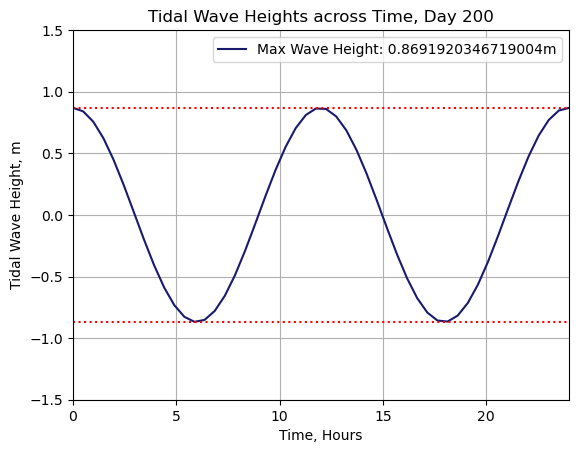

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# big_g = 6.67428 * pow(10, -11) #Nm^2/kg^2
# earth_mass = 5.972 * pow(10, 24) #kg
# earth_rot_period = 23.9333 #in hours
# earth_radius = 6378 #kilometers
# earth_orb_period = 365.2422 #days
# axial_tilt = (23.5 * np.pi) / 180
# gem = 0.0098 #km/s^2

# #Moon
# moon_mass = 7.348 * pow(10, 22) #kg
# moon_orb_period = 27.2917 #days
# ecm_apogee = 405696 #km
# ecm_perigee = 363300 #km
# gcm = 0.001625 #km/s^2
# #Sun
# sun_mass = 1.989 * pow (10, 30) #kg
# es_aphelion = 152097701 #km
# es_perihelion = 147098074 #km

# ##Intermediate Vars
# es_amp = (es_aphelion - es_perihelion)/2
# em_amp = (ecm_apogee - ecm_perigee)/2

t_days = np.arange(0,720)

emdx = (ecm_apogee)*np.cos((2*np.pi*200)/(earth_rot_period*moon_orb_period))
emdy = (ecm_perigee)*np.sin((2*np.pi*200)/(earth_rot_period*moon_orb_period))
emd = np.sqrt(emdx**2 + emdy**2)
earth_sun_distance = (es_amp)*np.cos((2*(np.pi)*200)/(earth_rot_period*earth_orb_period) + np.pi - ((2*np.pi)/(earth_rot_period*14))) + (es_aphelion-es_amp)

##Tide Functions
def tide_moon(x):
    return ((3*big_g*moon_mass*((earth_radius*1000)**2))/(2*9.8*((emd*1000)**3)))*np.cos((4*(np.pi)*x)/(earth_rot_period))*np.cos(0)

def tide_sun(x):
    return ((3*big_g*sun_mass*((earth_radius*1000)**2))/(2*9.8*((earth_sun_distance*1000)**3)))*np.cos((4*(np.pi)*x)/(earth_rot_period))*np.cos(0)

def tides(x):
    return np.add(tide_moon(x),tide_sun(x))

##Animation
x = np.linspace(0, 24)
y = np.array([])
for i in range(0, len(x)):
    y = np.append(y, tides(x[i]))

max = np.max(y)
fig, ax = plt.subplots()
line, = ax.plot(x, y, color = "midnightblue", label = "Max Wave Height: " + str(max) + "m")
ax.legend(loc = 'upper right')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    return line,
    
plt.axhline(y = max, linestyle = ':', color = "r")
plt.axhline(y = -max, linestyle = ':', color = "r")
plt.xlim(0,24)
plt.ylim(-1.5,1.5)
plt.xlabel("Time, Hours")
plt.ylabel("Tidal Wave Height, m")
plt.title("Tidal Wave Heights across Time, Day 200")
plt.grid()
plt.show()

ani = animation.FuncAnimation(fig, update, len(x), interval=100, 
                              fargs=[x, y, line], blit=True)

ani.save('animation_drawing200.gif', writer='pillow', fps=60)